In [5]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date,timedelta
from osgeo import gdal, gdal_array, ogr, osr

In [2]:
files = r"D:\era5\data"
indicators = ['temperature_2m', 'u_component_of_wind_10m', 'v_component_of_wind_10m', 'total_precipitation_sum', 'sub_surface_runoff_sum', 'soil_temperature_level_1']

In [3]:
files_temp = [os.path.join(files, file) for file in os.listdir(files) if re.search(indicators[0], file) and file.endswith('.tif')]
files_uwind = [os.path.join(files, file) for file in os.listdir(files) if re.search(indicators[1], file) and file.endswith('.tif')]
files_vwind = [os.path.join(files, file) for file in os.listdir(files) if re.search(indicators[2], file) and file.endswith('.tif')]
files_prec = [os.path.join(files, file) for file in os.listdir(files) if re.search(indicators[3], file) and file.endswith('.tif')]
files_runoff = [os.path.join(files, file) for file in os.listdir(files) if re.search(indicators[4], file) and file.endswith('.tif')]
files_soil_temp = [os.path.join(files, file) for file in os.listdir(files) if re.search(indicators[5], file) and file.endswith('.tif')]

In [4]:
def GetValuesList(files):    
    vals = []
    for file in files:
        ds = gdal.Open(file)
        arr = ds.ReadAsArray()
        val = np.median(arr)
        vals.append(val)
        ds = None
    return vals

def DegreesFromKelvins(data):
    return [record - 273.15 for record in data]

vals_temp = DegreesFromKelvins(GetValuesList(files_temp))
vals_uwind = GetValuesList(files_uwind)
vals_vwind = GetValuesList(files_vwind)
vals_prec = GetValuesList(files_prec)
vals_runoff = GetValuesList(files_runoff)
vals_soil_temp = DegreesFromKelvins(GetValuesList(files_soil_temp))
start_date = date(2022, 7, 1)
period = 41
dates = [(start_date + timedelta(days=i)).isoformat() for i in range(0, period)]
# dates = [(start_date + timedelta(days=i)).strftime("%d.%m") for i in range(0, period)]

In [10]:
df = df = pd.DataFrame(data={'Date': dates, indicators[0]: vals_temp, indicators[1]: vals_uwind,
                            indicators[2]: vals_vwind, indicators[3]: vals_prec, indicators[4]: vals_runoff,
                            indicators[5]: vals_soil_temp})
path_out = r"D:\era5\result.xls"
with pd.ExcelWriter(path_out) as writer:
    df.to_excel(writer, sheet_name="Sheet1")

C:\Users\Arthur Minaev\AppData\Local\Temp\ipykernel_5916\2569617849.py:5: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  with pd.ExcelWriter(path_out) as writer:


In [11]:
df

,Date,temperature_2m,u_component_of_wind_10m,v_component_of_wind_10m,total_precipitation_sum,sub_surface_runoff_sum,soil_temperature_level_1
0,2022-07-01,24.984244,0.000000,0.251205,4.319925e-04,3.352761e-08,26.523526
1,2022-07-02,22.988374,2.992476,-1.424719,0.000000e+00,2.980232e-08,24.855530
2,2022-07-03,22.402544,3.804168,-1.534241,7.662177e-06,2.980232e-08,23.739374
3,2022-07-04,24.290332,2.481146,0.000000,8.583069e-07,2.980232e-08,25.398794
4,2022-07-05,26.303878,0.490519,-1.234810,2.166134e-06,2.980232e-08,26.848790
5,2022-07-06,25.766465,-3.268018,0.000000,4.351138e-07,2.980232e-08,27.930393
6,2022-07-07,24.848096,-4.224596,0.037480,4.440676e-07,2.980232e-08,27.268089
7,2022-07-08,26.288435,-3.074696,0.169654,1.287460e-06,2.980232e-08,28.105924
8,2022-07-09,28.146943,-2.276819,0.346771,3.006348e-06,2.980232e-08,30.136068
9,2022-07-10,29.728740,-3.371019,0.202259,1.290441e-06,2.980232e-08,31.314985


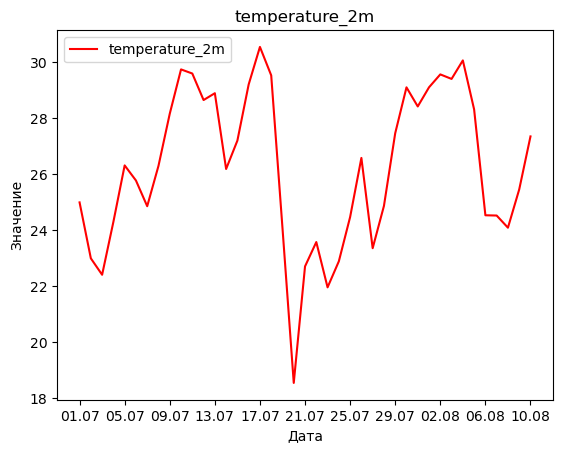

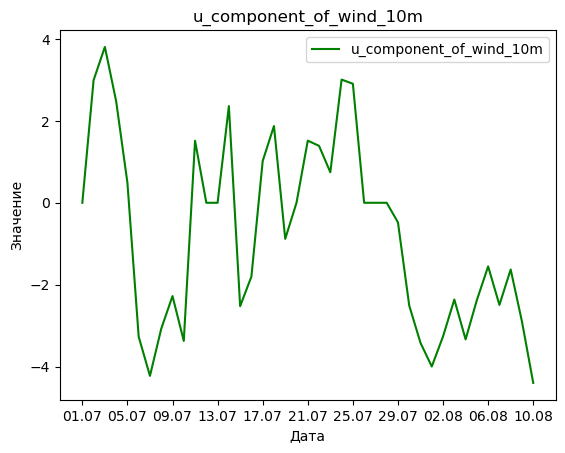

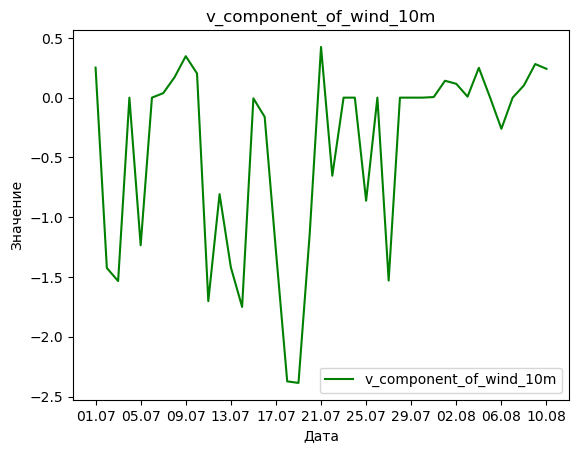

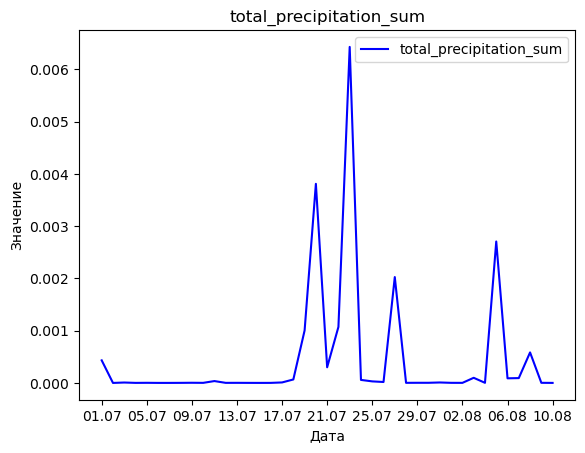

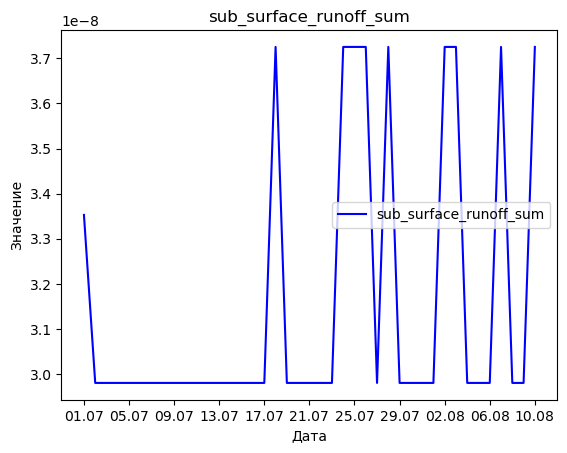

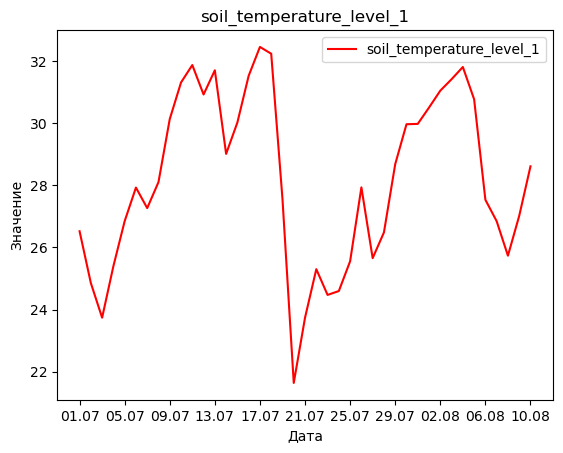

In [15]:
def DrawGraph(dates, vals, alias, period, color='b'): 
    plt.plot(dates, vals, color, label=alias)
    plt.title(alias)
    plt.legend()
    plt.xticks(np.arange(0, period, 4))
    plt.xlabel('Дата')
    plt.ylabel('Значение')
    plt.show()

DrawGraph(dates, vals_temp, indicators[0], period, color='r')
DrawGraph(dates, vals_uwind, indicators[1], period, color='g')
DrawGraph(dates, vals_vwind, indicators[2], period, color='g')
DrawGraph(dates, vals_prec, indicators[3], period, color='b')
DrawGraph(dates, vals_runoff, indicators[4], period, color='b')
DrawGraph(dates, vals_soil_temp, indicators[5], period, color='r')